In [ ]:
#If opening in colab run this cell
!git clone https://github.com/CTVisMe/DS4B_Sp24.git
%cd DS4B_Sp24/Homeworks

Cloning into 'DS4B_Sp24'...
remote: Enumerating objects: 933, done.
remote: Counting objects: 100% (335/335), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 933 (delta 172), reused 327 (delta 166), pack-reused 598
Receiving objects: 100% (933/933), 164.78 MiB | 11.64 MiB/s, done.
Resolving deltas: 100% (435/435), done.
Updating files: 100% (162/162), done.
/content/DS4B_Sp24/Homeworks


In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve

**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**








# Predicting Churn

After discussing the churn problem at TelCo with Nadia for a while (remember, from HW0?), you've finally defined an adequate target variable for churn and gathered relevant data to predict it. Moreover, the marketing department has come up with an amazing retention offer: the offer is guaranteed to convince customers to extend their contract for an extra year after receiving it. Unfortunately, the offer is quite expensive; it costs $200. __You have enough budget to give the retention offer to up to 25% of the customers whose contracts are expiring.__

It is your job to use data from previous contract expirations to build a churn predictive model and make a recommendation of whom to target with the offers. You have assembled the best historical data set you can at this point, which includes:

- Gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependents: Whether the customer has dependents or not (Yes, No)
- Tenure: Number of months the customer has stayed with the company
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: The amount charged to the customer monthly
- Churn: Whether the customer churned or not shortly after contract expiration (Yes or No)

__1. Load the churn data. The code below will also transform your categorical variables into dummy variables. No points for this. This is just meant to help you get started.__

In [ ]:
# If necessary change the path below so that it points to your file.
data_path = "./data/data-hw3.csv"

df = pd.read_csv(data_path)
df = pd.get_dummies(df, drop_first=True)
print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns in this dataset')
df.head()

There are 7,032 rows and 30 columns in this dataset


,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,False,True,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,False,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,True


__2. Split the data into 80% training data and 20% test data.__

In [ ]:
X = df.drop(columns="Churn_Yes")
y = df["Churn_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

__3. Build the best model you can using a decision tree classifier. Using 10-fold Cross-validation on the TRAINING set, try several values between 10 and 200 for the hyperparameter `min_samples_leaf`.__ You can use a for loop or `GridSearchCV` for this (do not use the TEST data at all for this example).  Report the best value of the parameter `min_samples_leaf` and the AUC associated with it.   

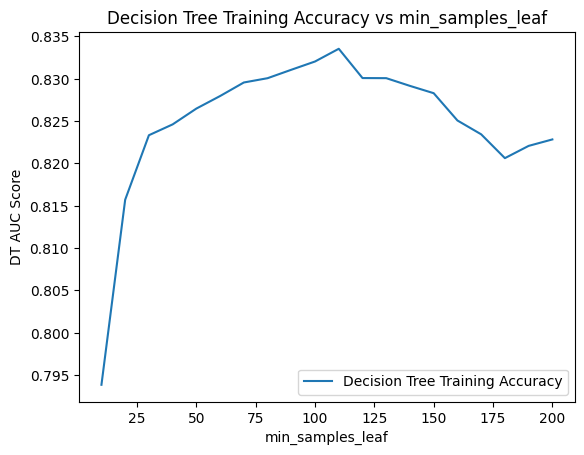

In [ ]:
min_samples_leaf_values = np.arange(10, 201,10)
DT_auc_scores = []

for min_samples_leaf in min_samples_leaf_values:
    DT_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    DT_avg_auc_score = cross_val_score(DT_model, X_train, y_train, cv=10, scoring='roc_auc').mean()
    DT_auc_scores.append(DT_avg_auc_score)

plt.plot(min_samples_leaf_values, DT_auc_scores, label='Decision Tree Training Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('DT AUC Score')
plt.title('Decision Tree Training Accuracy vs min_samples_leaf')
plt.legend()
plt.show()



In [ ]:
best_DT_auc = max(DT_auc_scores)
best_min_samples_leaf = min_samples_leaf_values[DT_auc_scores.index(best_DT_auc)]
print(f'Best Decision Tree AUC: {best_DT_auc:.4f}')
print(f'Best min_samples_leaf: {best_min_samples_leaf}')

Best Decision Tree AUC: 0.8335
Best min_samples_leaf: 110


**4.  Do the same for logistic regression.  Try different values for the hyperparameter C between 10 and 200**


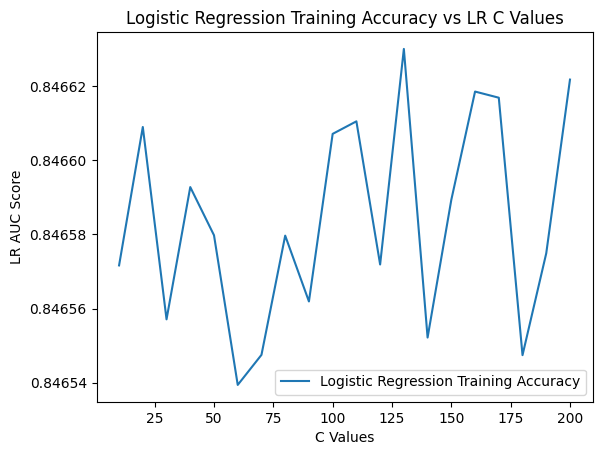

In [ ]:
C_values = np.arange(10, 201,10)
LR_auc_scores = []

for C in C_values:
    LR_model = LogisticRegression(C=C, solver='liblinear',max_iter=100)
    LR_avg_auc_score = cross_val_score(LR_model, X_train, y_train, cv=10, scoring='roc_auc').mean()
    LR_auc_scores.append(LR_avg_auc_score)

plt.plot(C_values, LR_auc_scores, label='Logistic Regression Training Accuracy')
plt.xlabel('C Values')
plt.ylabel('LR AUC Score')
plt.title('Logistic Regression Training Accuracy vs LR C Values')
plt.legend()
plt.show()

In [ ]:
best_LR_auc = max(LR_auc_scores)
best_LR_C = C_values[LR_auc_scores.index(best_LR_auc)]
print(f'Best Logistic Regression AUC: {best_LR_auc:.4f}')
print(f'Best C Value: {best_LR_C}')

Best Logistic Regression AUC: 0.8466
Best C Value: 130


**5.  Now do a third classification model of your choice. You can use something we learned in class or something else you want to try!  SVM, kNN, NeuralNet, RandomForest etc .  Whatever model you choose -- pick a hyperparameter and try and optimize.**

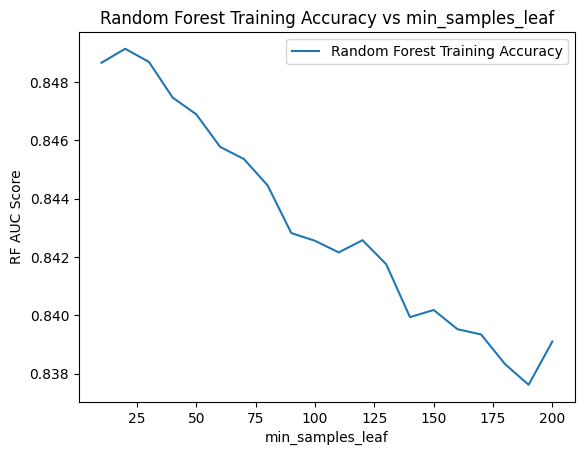

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_min_samples_leaf_values = np.arange(10, 201,10)
RF_auc_scores = []

for min_samples_leaf in RF_min_samples_leaf_values:
    RF_model = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    RF_avg_auc_score = cross_val_score(RF_model, X_train, y_train, cv=10, scoring='roc_auc').mean()
    RF_auc_scores.append(RF_avg_auc_score)

plt.plot(RF_min_samples_leaf_values, RF_auc_scores, label='Random Forest Training Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('RF AUC Score')
plt.title('Random Forest Training Accuracy vs min_samples_leaf')
plt.legend()
plt.show()

In [ ]:
best_RF_auc = max(RF_auc_scores)
best_RF_min_samples_leaf = RF_min_samples_leaf_values[RF_auc_scores.index(best_RF_auc)]
print(f'Best Random Forest AUC: {best_RF_auc:.4f}')
print(f'Best min_samples_leaf: {best_RF_min_samples_leaf}')

Best Random Forest AUC: 0.8491
Best min_samples_leaf: 20


__6.  Select a "best" model based on your three models above, what is it?__  

In [ ]:
model_auc_dict = {'Decision Tree': best_DT_auc, 'Logistic Regression': best_LR_auc, 'Random Forest': best_RF_auc}

best_model = max(model_auc_dict, key=model_auc_dict.get)

# Print the best model
print(f"The best model is {best_model} as it has the highest AUC of {model_auc_dict[best_model]:.4f}")

The best model is Random Forest as it has the highest AUC of 0.8491


__7. Use your TEST  data to plot the ROC Curves for each of the three best models you found in the previous question (make sure to plot the three curves together on the same plot). Would you consider changing your model choice after looking at the curves?__

HINT: There are some helpful code hints below, but you will need to edit them with the right arguments!!

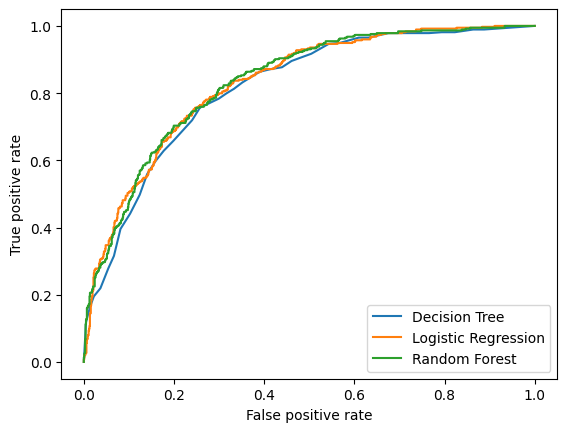

In [ ]:
models = [DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf),
          LogisticRegression(C=best_LR_C, solver='liblinear'),
          RandomForestClassifier(min_samples_leaf=best_RF_min_samples_leaf)]

# Call 'fit' on the entire TRAINING data for each model
for model in models:
    model.fit(X_train, y_train)

# Determine probabilities of churn from the TEST data (using .predict_proba)
probs = [model.predict_proba(X_test)[:, 1] for model in models]

# Use "roc_curve" to get the points for the three curves
fprs, tprs, thresholds = zip(*[roc_curve(y_test, prob) for prob in probs])

# Plot the ROC curves
plt.plot(fprs[0], tprs[0], label='Decision Tree')
plt.plot(fprs[1], tprs[1], label='Logistic Regression')
plt.plot(fprs[2], tprs[2], label='Random Forest')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")
plt.legend()
plt.show()


**Interpretation**: Looking at the ROC curves of the three models, we can see that the Random Forest model has the highest True Positive Rate for a given False Positive Rate compared to the other two models. This indicates that the Random Forest model has better overall performance in terms of correctly classifying positive instances (churned customers) while minimizing false positives. Thus, Random Forest model will still be the preferred choice.

__8. What are the costs and benefits of this offer?  HINT: Take a look at the description of the data and the retention offer. You can think in terms of averages across all customers.__

The costs and benefits of this offer can be evaluated based on the average churn rate and the budget allocated for the retention offer.

Costs:

The cost of the retention offer is $200 per customer. The budget for the retention offer is limited to 25% of the customers whose contracts are expiring.

Benefits:

The retention offer is guaranteed to convince customers to extend their contract for an extra year. For the customers we retained (those with Churn=1) our annual benefit is the MonthlyCharge*12. Therefor the Profit per Retained Customer = (MonthlyCharges x 12) - $200.

__9. Using your best model along with the costs and benefits, now we want to plot a PROFIT CURVE.  Split your TRAINING data into two sets, one with 90% of the TRAINING data (the "SUB-TRAINING" set) and another with 10% of the TRAINING data (the VALIDATION set). Train the model you selected with the "SUB-TRAINING" set, apply it to the VALIDATION set, and plot a profit curve by sorting customers according to their probability of churning.   Calculate the profit at each threshold, and show the appropriate plot.  Make a recommendation to Nadia of the appropriate threshold to use - aka how many people to target with the retention incentive according to this profit curve.__

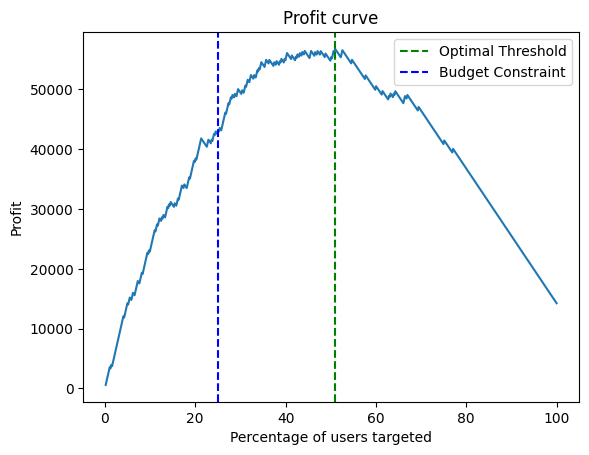

In [ ]:
# Split the training data into sub-training and validation sets
random_state=42
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=random_state)

# Declaring the best model with the best hyperparameter as found above
model = RandomForestClassifier(min_samples_leaf=best_RF_min_samples_leaf)

# Train the model on the sub-training set
model.fit(X_subtrain, y_subtrain)

# Get the predicted probabilities for the validation set
probs_val = model.predict_proba(X_val)[:, 1]

avg_annual_revenue = np.mean(np.asarray(X_val['MonthlyCharges']) * 12)
unit_cost = 200

total_observations = len(y_val)
total_positives = y_val.sum()

# Sort these probabilities and the true value in descending order of probability
order = np.argsort(probs_val)[::-1]
val_prob_sort = probs_val[order]
yval_sort = np.array(y_val)[order]

num_values = int(len(val_prob_sort) * 0.25)
first_25_percent = val_prob_sort[:num_values]

# Build the cumulative response curve
thresholds = np.arange(len(val_prob_sort)) + 1
ycum = np.cumsum(yval_sort)

# Rescale
thresholds = np.array(thresholds)/float(thresholds.max())
ycum = np.array(ycum)/float(ycum.max())

num_retained_customers = ycum * total_positives
num_targeted_customers = thresholds * total_observations

profits = avg_annual_revenue * num_retained_customers - unit_cost * num_targeted_customers

# Plot the profit curve
plt.plot(thresholds * 100, profits)

# Plot the optimal threshold
optimal_threshold = thresholds[np.argmax(profits)]
plt.axvline(x=optimal_threshold * 100, color='green', linestyle='--', label='Optimal Threshold')

# Plot the budget constraint
budget_constraint = 25
plt.axvline(x=budget_constraint, color='blue', linestyle='--', label='Budget Constraint')

# Plot other details
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profit curve")
plt.legend()

# Show the plot
plt.show()

In this case we would make the most profit at the point where the curve is maximized  - BUT we only have budget to target 25% so we cannot realize the optimal profit with the operating expenses we have. The best we can do is target the full 25% that we have budget for. This will be our threshold and our plan going forward.  Lets calculate the profit at the threshold where we target 25% of the customers.

In [ ]:
max_profit = profits.max()
max_profit_index = profits.argmax()
optimal_threshold = thresholds[max_profit_index]
optimal_num_users_targeted = int(optimal_threshold * len(y_val))
print(f'Maximum profit is ${max_profit:.2f} when {optimal_threshold * 100:.2f}% ({optimal_num_users_targeted}) of the users are targetted')

BC_num_users_targeted = int(budget_constraint / 100 * len(profits))
BC_profit = profits[BC_num_users_targeted]
print(f"Profit at {budget_constraint}% budget constraint: ${BC_profit:.2f} when {(BC_num_users_targeted)} users are targetted")

Maximum profit is $56605.57 when 46.89% (264) of the users are targetted
Profit at 25% budget constraint: $44737.04 when 140 users are targetted


__10. Now that you have chosen a model and a threshold, it is time to evaluate the potential impact of your solution on the holdout set. Using the results from your targeting above, how much money do you estimate that your recommendation would have saved as compared to giving the offer to a random set of customers?__

**Model-Based Targeting - Avg. Annual Revenue Approach**

In [ ]:
test_avg_annual_revenue = np.mean(np.asarray(X_test['MonthlyCharges']) * 12)
unit_cost = 200

Y_prob = model.predict_proba(X_test)[:, 1]

order = np.argsort(Y_prob)[::-1]
Y_prob_sort = Y_prob[order]
Y_test_sort = np.array(y_test)[order]

# Get the top 25% of the customers
num_values = int(len(Y_prob_sort) * 0.25)
#first_25_percent = Y_prob_sort[:num_values]

test_model_profit = test_avg_annual_revenue * Y_test_sort[:num_values].sum() - unit_cost * num_values
print(f'Revenue earned from Model-based targeting: ${test_model_profit:.2f}')


Revenue earned from Model-based targeting: $101148.50


**Randomly Targetted Customers - Avg.

Annual Revenue Approach**

---



In [ ]:
# Give offer to random set of customers
random.seed(123)

# Extracting random indices (=num_values) from Y_prob - this will select a random 25% of customers
random_indices = random.sample([list(Y_prob).index(i) for i in Y_prob],num_values)

# Extracting Y_prob and y_test_sort based on random indices
Y_prob_random = Y_prob[random_indices]
y_test_sort_random = np.array(y_test)[random_indices]

random_profit = test_avg_annual_revenue * y_test_sort_random.sum() - unit_cost * num_values
print(f'Revenue earned from Random targeting: ${random_profit:.2f}')

Revenue earned from Random targeting: $-2912.46


**Money saved**

In [ ]:
print(f'Model-based targeting saved ${test_model_profit - random_profit:.2f} when compared to Random-based targeting')

Model-based targeting saved $104060.96 when compared to Random-based targeting


__11.  Is there a better way to rank customers to take advantage of their individual spending - rather than using an average across all customers?  Calculate an individualized expected value for profit/loss for each customer to rank them. Use it to plot a profit curve according to this new ranking.  Do the same comparison against a random set as you did in number 10.  Are the results any better? Would your recommendation change?__

**Model-Based Targeting - Individual Annual Revenue Approach**

Method 1 - sorting by Expected Revenue =  (Y_prob * individual_revenue)

In [ ]:
individual_annual_revenue = np.asarray(X_test['MonthlyCharges'] * 12)
unit_cost = 200

Y_prob = model.predict_proba(X_test)[:, 1]

expected_indv_revenue = Y_prob * individual_annual_revenue

order = np.argsort(expected_indv_revenue)[::-1]
indv_revenue_sort = individual_annual_revenue[order]
Y_test_sort = np.array(y_test)[order]

num_values = int(len(expected_indv_revenue) * 0.25)
rev_25_percent = indv_revenue_sort[:num_values]
test_25_percent = Y_test_sort[:num_values]

test_individual_model_profit = np.sum(rev_25_percent * test_25_percent) - (unit_cost * num_values)
print(f'Individual Annual Revenue Approach: Revenue earned from Model-based targeting: ${test_individual_model_profit:.2f}')
print(f'Individual-based targeting saved ${test_individual_model_profit - random_profit:.2f} when compared to Random-based targeting')

Individual Annual Revenue Approach: Revenue earned from Model-based targeting: $139341.00
Individual-based targeting saved $142253.46 when compared to Random-based targeting


Method 2 - sorting by Churn probability but using the individualized charges to calculate profit.

In [ ]:
individual_annual_revenue = np.asarray(X_test['MonthlyCharges'] * 12)
unit_cost = 200

Y_prob = model.predict_proba(X_test)[:, 1]

# Sort probabilities in descending order
order = np.argsort(Y_prob)[::-1]
Y_test_sort = np.array(y_test)[order]
indv_revenue_sort = individual_annual_revenue[order]

num_values = int(len(Y_prob_sort) * 0.25)
indv_rev_25_percent = indv_revenue_sort[:num_values]
test_25_percent = Y_test_sort[:num_values]


test_individual_model_profit = np.sum(indv_rev_25_percent * test_25_percent) - (unit_cost * num_values)
print(f'Individual Annual Revenue Approach: Revenue earned from Model-based targeting: ${test_individual_model_profit:.2f}')

print(f'Individual-based targeting saved ${test_individual_model_profit - random_profit:.2f} when compared to Random-based targeting')

Individual Annual Revenue Approach: Revenue earned from Model-based targeting: $133789.20
Individual-based targeting saved $136701.66 when compared to Random-based targeting


**Money Saved - Choosing the best approach**

In [ ]:
# Difference in maximum profit between both approaches
Difference =  test_individual_model_profit - test_model_profit
print(f'Individual Annual Revenue approach saved ${Difference:.2f} when compared to Average Annual Revenue approach')

Individual Annual Revenue approach saved $32640.70 when compared to Average Annual Revenue approach


**Recommendation**: The result is better when Individual Annual Revenue is used

**SUBMIT BOTH IPYNB AND PDF VERSIONS OF THE HOMEWORK IN THE FORMAT OF LASTNAME_FIRSTNAME_HW3.IPYNB/PDF**
